<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/Pr%C3%A1ctica6_LabPDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LABORATORIO: PROCESAMIENTO DIGITAL DE IMÁGENES**

---


**PRÁCTICA 6:** Operaciones Aritméticas y Lógicas

**EQUIPO:**

Cinthia Janeth Pecina Hernández -  2062979  - 509

Sofia Viridiana Estrada Rosales  -  2132066 - 309

*   Librerías y Configurar visualización

In [31]:
# Importar librerías
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- FUNCIÓN PARA VISUALIZACIÓN ---
def mostrar_imagenes(titulo, *imgs):
    """Muestra un conjunto de imágenes en una sola figura de Matplotlib."""
    num_imgs = len(imgs)
    fig, axes = plt.subplots(1, num_imgs, figsize=(4 * num_imgs, 5))
    if num_imgs == 1:
        axes = [axes] # Asegurar que sea iterable

    for ax, (img_title, img_data) in zip(axes, imgs):
        # Uso de cmap='gray' si la imagen es escala de grises
        cmap = 'gray' if len(img_data.shape) == 2 else None
        ax.imshow(img_data, cmap=cmap)
        ax.set_title(img_title)
        ax.axis('off')
    plt.suptitle(titulo, fontsize=14)
    plt.show()

print("Librerías cargadas con éxito")

Librerías cargadas con éxito


**Parte I.- Operaciones aritméticas**

Ejercicio 1: Suma de imágenes

*1. Carga y Preprocesamiento de Imágenes*

In [32]:
# Cargar imágenes
img1_color = cv.imread('tumor_derecho.jpg')
img2_color = cv.imread('tumor_izquierdo.jpg')

# Verificar en caso de Error
if img1_color is None or img2_color is None:
    print("------------------------------------------------------------------")
    print("¡ERROR DE CARGA! Uno o ambos archivos de imagen no se encontraron o no se pudieron leer.")
    print("Asegúrate de que los nombres y rutas de 'imagen_a.jpg' y 'imagen_b.jpg' sean correctos.")
    print("------------------------------------------------------------------")
else:
    # Carga exitosa, procede a la conversión y el procesamiento
    print("Imágenes cargadas exitosamente. Convirtiendo a escala de grises...")

    # Convertir a escala de grises
    img1 = cv.cvtColor(img1_color, cv.COLOR_BGR2GRAY)
    img2 = cv.cvtColor(img2_color, cv.COLOR_BGR2GRAY)

  # Ajustar tamaño
    if img1.shape != img2.shape:
        ancho, alto = img1.shape[1], img1.shape[0]
        img2 = cv.resize(img2, (ancho, alto), interpolation=cv.INTER_AREA)# Nombres de mis archivos
NOMBRE_IMG_A = 'tumor_derecho.jpg'
NOMBRE_IMG_B = 'tumor_izquierdo.jpg'

Imágenes cargadas exitosamente. Convirtiendo a escala de grises...


*2. y 3. Suma Ponderada y Suma Promedio*
Aplico la suma ponderada (`cv.addWeighted()`) para ver cómo se fusiona la información con diferentes pesos. El caso 50/50 es la suma promedio

*4. Mostrar Resultados*
Muestro las imágenes originales y los resultados de las sumas

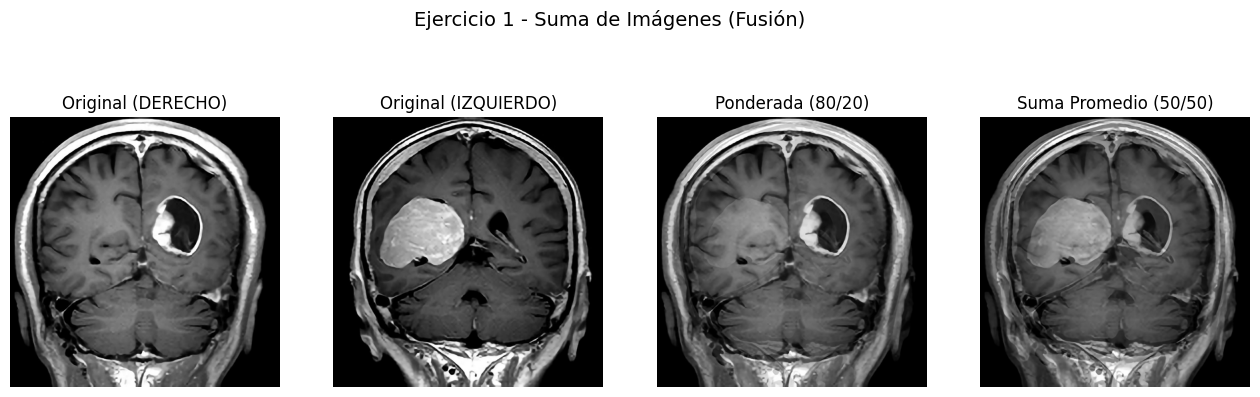

In [33]:
# 2. Aplicar la suma ponderada con diferentes pesos
# Caso A: Mayor peso a tumor_derecho (Img1: 80% y Img2: 20%)
suma_ponderada_A = cv.addWeighted(img1, 0.8, img2, 0.2, 0)

# Caso B: Mayor peso a tumor_izquierdo (Img1: 30% y Img2: 70%)
suma_ponderada_B = cv.addWeighted(img1, 0.3, img2, 0.7, 0)

# 3. Aplicar la suma promedio (50% y 50%)
suma_promedio = cv.addWeighted(img1, 0.5, img2, 0.5, 0)

# 4. Mostrar resultados con imágenes originales
mostrar_imagenes(
    "Ejercicio 1 - Suma de Imágenes (Fusión)",
    ("Original (DERECHO)", img1),
    ("Original (IZQUIERDO)", img2),
    ("Ponderada (80/20)", suma_ponderada_A),
    ("Suma Promedio (50/50)", suma_promedio)
)

**Ejercicio 2: Resta de Imágenes**

*1. y 2. Restar y Usar `cv.absdiff`*
Realizo la resta estándar (solo para ver qué ocurre con NumPy) y luego utilizo `cv.absdiff` para obtener la diferencia absoluta. Esto es útil para resaltar las áreas donde las dos imágenes médicas difieren.

*3. Mostrar Resultados*
Muestro el resultado de la resta absoluta.

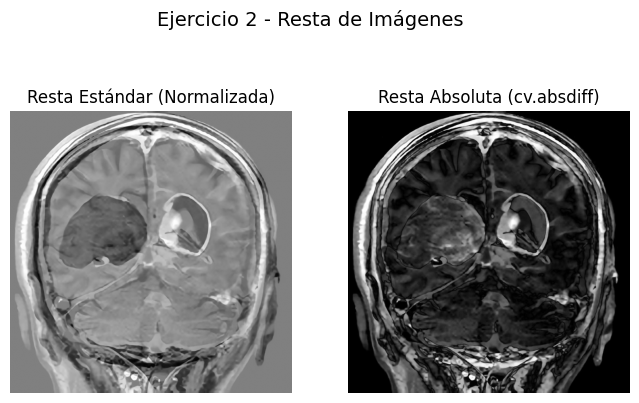

In [34]:
# 1. Restar las dos imágenes (NumPy para análisis de underflow)
# Uso int16 para permitir valores negativos
resta_np_int = img1.astype(np.int16) - img2.astype(np.int16)
# Normalizo para poder visualizar la resta estándar
resta_analisis = cv.normalize(resta_np_int, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# 2. Usar cv.absdiff para evitar valores negativos
resta_abs = cv.absdiff(img1, img2)

# Análisis: Se observa que absdiff resalta los contornos y las estructuras que no coinciden (como las posiciones de los tumores).

# 3. Mostrar resultados
mostrar_imagenes(
    "Ejercicio 2 - Resta de Imágenes",
    ("Resta Estándar (Normalizada)", resta_analisis),
    ("Resta Absoluta (cv.absdiff)", resta_abs)
)

**Ejercicio 3: Multiplicación por un Factor**

*1. y 2. Aplicar y Comparar 3 Factores*
Aplico diferentes factores de multiplicación a mi primera imagen (`tumor_derecho`) para modificar el brillo y el contraste. Un factor > 1 aclara, y un factor < 1 oscurece.

*3. Mostrar Resultados*
Muestro la imagen original junto a las tres variaciones.

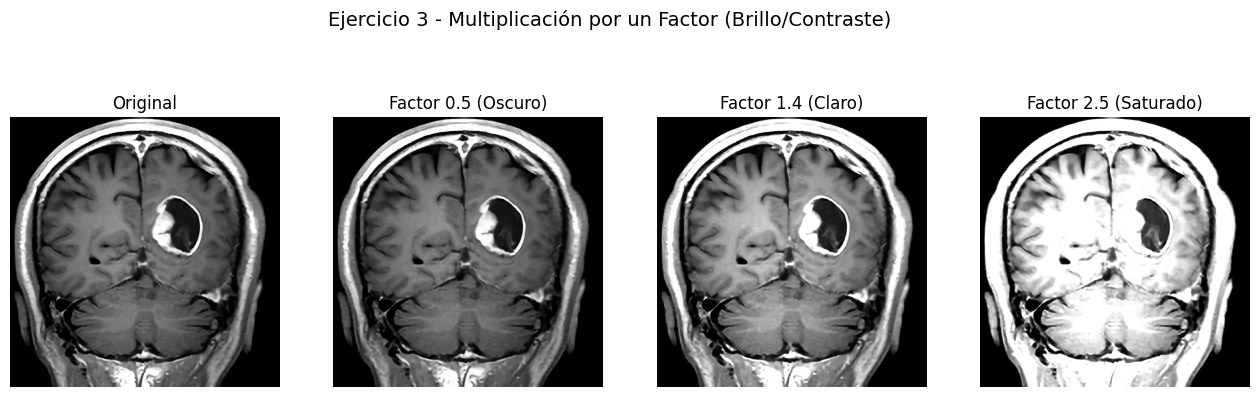

In [35]:
# Factores de multiplicación
factor_oscuro = 0.5  # Reduce brillo/contraste
factor_claro = 1.4   # Aumenta ligeramente
factor_saturado = 2.5 # Aumenta mucho y puede saturar

# 1. Aplicar un factor de multiplicación a la Imagen 1
# Usamos cv.convertScaleAbs para aplicar la fórmula: resultado = alpha * src + beta
img1_oscuro = cv.convertScaleAbs(img1, alpha=factor_oscuro, beta=0)
img1_claro = cv.convertScaleAbs(img1, alpha=factor_claro, beta=0)
img1_saturado = cv.convertScaleAbs(img1, alpha=factor_saturado, beta=0)

# 3. Mostrar resultados
mostrar_imagenes(
    "Ejercicio 3 - Multiplicación por un Factor (Brillo/Contraste)",
    ("Original", img1),
    (f"Factor {factor_oscuro} (Oscuro)", img1_oscuro),
    (f"Factor {factor_claro} (Claro)", img1_claro),
    (f"Factor {factor_saturado} (Saturado)", img1_saturado)
)

**Ejercicio 4: Multiplicación Elemento por Elemento**

*1. Multiplicar Píxel a Píxel*
Multiplico las dos imágenes originales píxel a píxel.

*2. Análisis Biomédico*
El resultado de esta operación es similar a una operación AND. Analizo su utilidad en el contexto de imágenes médicas.

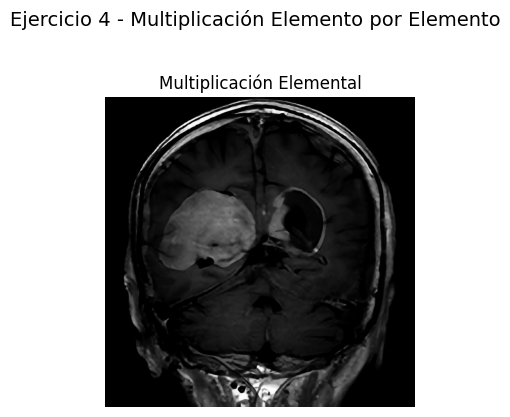


Análisis:
La multiplicación elemento por elemento es útil para aplicar MÁSCARAS o Regiones de Interés (ROI).


In [36]:
# 1. Multiplicar las dos imágenes médicas píxel a píxel
# Escalo por 1/255 para evitar la saturación y mantener el rango [0, 255]
multiplicacion_elemental = cv.multiply(img1.astype(np.float32), img2.astype(np.float32), scale=1/255)
multiplicacion_elemental = np.clip(multiplicacion_elemental, 0, 255).astype(np.uint8)

mostrar_imagenes(
    "Ejercicio 4 - Multiplicación Elemento por Elemento",
    ("Multiplicación Elemental", multiplicacion_elemental)
)

# 2. Análisis de aplicaciones biomédicas
print("\nAnálisis:")
print("La multiplicación elemento por elemento es útil para aplicar MÁSCARAS o Regiones de Interés (ROI).")

**Parte II: Operaciones Lógicas (Ecualización)**

*Ejercicio 1: Ecualización de Histograma*

*Proceso de Ecualización*

Selecciono mi primera imagen (`tumor_derecho`) para aplicarle ecualización de histograma y mejorar el contraste. Calculo el histograma original y el ecualizado para compararlos visualmente con las imágenes.



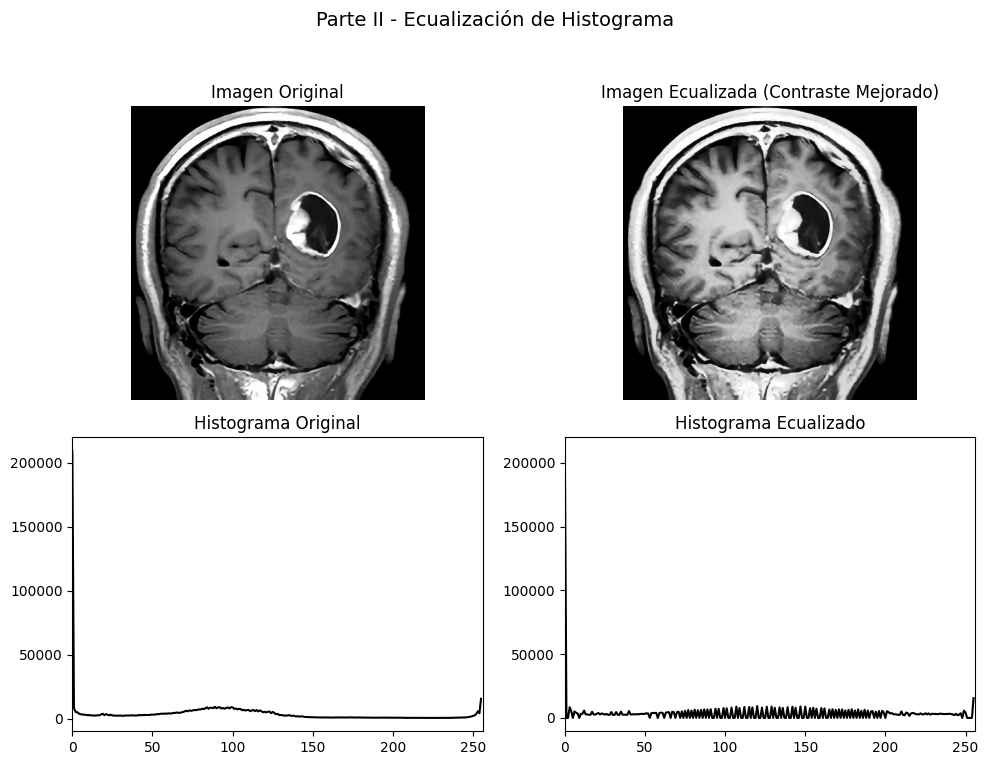


Análisis del Histograma:
El histograma original (si es de bajo contraste) estará concentrado en un rango estrecho. El ecualizado distribuye los píxeles a lo largo de todo el rango de 0 a 255, dando como resultado un mayor detalle y mejor contraste.


In [38]:
# 1. Cargar una imagen médica (ya cargada como img1, asumo que tiene bajo contraste)
img_original_eq = img1

# 2. Obtener y visualizar el histograma de la imagen original
hist_original = cv.calcHist([img_original_eq], [0], None, [256], [0, 256])

# 3. Aplicar ecualización de histograma
img_ecualizada = cv.equalizeHist(img_original_eq)

# 4. Obtener el histograma de la imagen mejorada
hist_ecualizado = cv.calcHist([img_ecualizada], [0], None, [256], [0, 256])

# 4. Mostrar la imagen original, la imagen mejorada y comparar los histogramas
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Imagen Original y su Histograma
axes[0, 0].imshow(img_original_eq, cmap='gray'); axes[0, 0].set_title('Imagen Original'); axes[0, 0].axis('off')
axes[1, 0].plot(hist_original, color='black'); axes[1, 0].set_title('Histograma Original'); axes[1, 0].set_xlim([0, 256])

# Imagen Ecualizada y su Histograma
axes[0, 1].imshow(img_ecualizada, cmap='gray'); axes[0, 1].set_title('Imagen Ecualizada (Contraste Mejorado)'); axes[0, 1].axis('off')
axes[1, 1].plot(hist_ecualizado, color='black'); axes[1, 1].set_title('Histograma Ecualizado'); axes[1, 1].set_xlim([0, 256])

plt.suptitle("Parte II - Ecualización de Histograma", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nAnálisis del Histograma:")
print("El histograma original (si es de bajo contraste) estará concentrado en un rango estrecho. El ecualizado distribuye los píxeles a lo largo de todo el rango de 0 a 255, dando como resultado un mayor detalle y mejor contraste.")